**Exploración de la base de datos**

Base de datos de conversaciones telefonicas en la cual el cliente decide en **comprar o no** el producto.
En la columna Label *0 representa que no se realizo la venta* y *1 que si se realizo.*

In [3]:
#Se instalan las librerias
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
nltk.download('punkt')
from scipy.stats import shapiro
# Leemos por medio de  pandas nuestra base de datos
df = pd.read_csv('df_extended_2.csv')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
df.shape

(555, 3)

In [5]:
df.head(2)

,Conversación,Horario,Label
0,"Tal vez No estoy seguro, necesito más informac...",noche,0
1,"Quizás Me parece muy caro, ¿hay algún descuento?",noche,0


Cantidad de compras y no compras

In [7]:
df.Label.value_counts()

1    344
0    211
Name: Label, dtype: int64

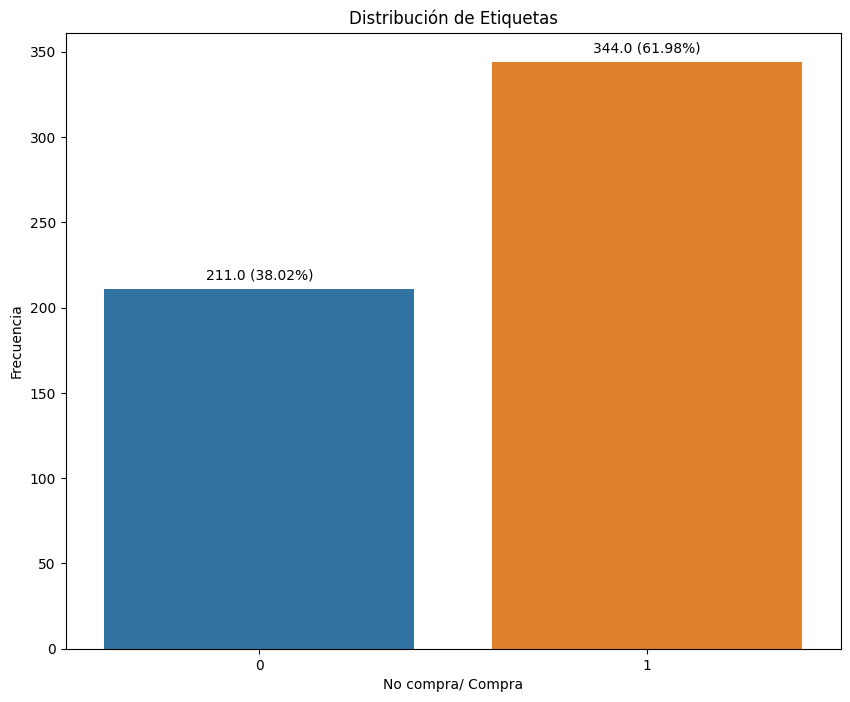

In [12]:
# Distribución de las etiquetas de sentimientos
plt.figure(figsize=(10, 8))

# Crear el gráfico de barras con Seaborn
ax = sns.countplot(x='Label', data=df)

# Agregar título y etiquetas a los ejes
plt.title('Distribución de Etiquetas')
plt.xlabel('No compra/ Compra')
plt.ylabel('Frecuencia')

# Anotar cada barra con el conteo y la proporción
for p in ax.patches:
    ax.annotate(f'{p.get_height()} ({p.get_height() / len(df) * 100:.2f}%)',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10),
                textcoords='offset points')

# Mostrar el gráfico
plt.show()

**Conjunto de palabras genéricas Stopword**

In [5]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
# Descarga la lista de palabras de parada en español de NLTK
nltk.download('stopwords')
spanish_stopwords = stopwords.words('spanish')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


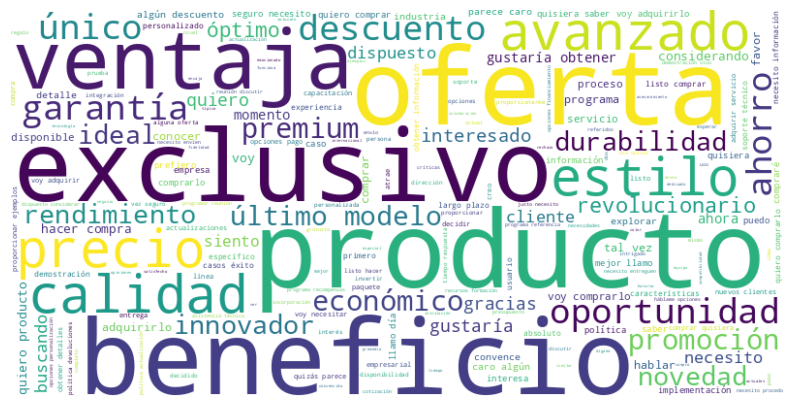

In [13]:
# Descargar las stopwords de NLTK (esto solo necesita hacerse una vez)
import nltk
nltk.download('stopwords')

# Concatenar todas las noticias en un solo texto
text = ' '.join(df['Conversación'])

# Tokenizar el texto en palabras
words = word_tokenize(text)

# Filtrar stopwords
stop_words = set(stopwords.words('spanish'))  # Puedes cambiar 'spanish' por 'english' si estás trabajando en inglés
filtered_words = [word.lower() for word in words if word.lower() not in stop_words and word.isalpha()]

# Crear la nube de palabras
filtered_text = ' '.join(filtered_words)
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color='white').generate(filtered_text)

# Mostrar la nube de palabras utilizando Matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

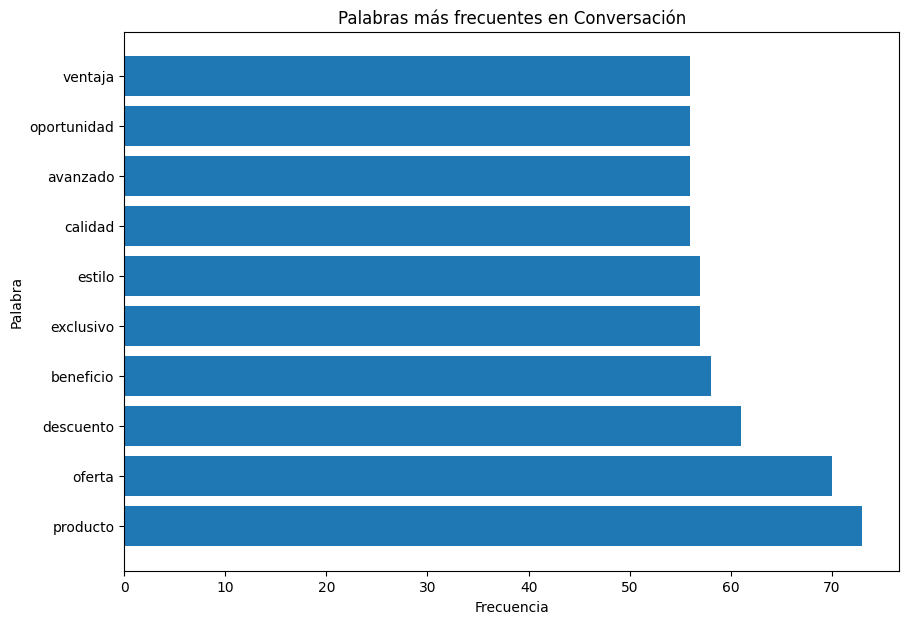

In [14]:
# Concatenar todas las noticias en un solo texto
text = ' '.join(df['Conversación'])

# Tokenizar el texto en palabras
words = word_tokenize(text)

# Filtrar stopwords
stop_words = set(stopwords.words('spanish'))
filtered_words = [word.lower() for word in words if word.lower() not in stop_words and word.isalpha()]

# Crear un contador de palabras
word_counter = Counter(filtered_words)

# Obtener las 10 palabras más frecuentes
top_words = dict(word_counter.most_common(10))

# Crear el gráfico de barras vertical
plt.figure(figsize=(10, 7))
plt.barh(list(top_words.keys()), list(top_words.values()))
plt.title('Palabras más frecuentes en Conversación')
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
plt.show()

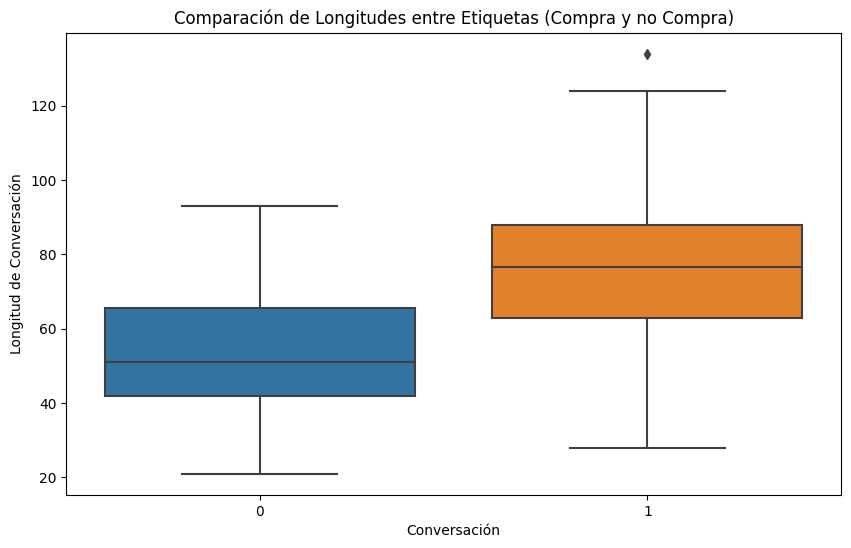

In [26]:
# Calcular la longitud de cada noticia
df['longitud_Conversación'] = df['Conversación'].apply(len)

# Crear un boxplot para comparar las longitudes entre etiquetas
plt.figure(figsize=(10, 6))
sns.boxplot(x='Label', y='longitud_Conversación', data=df)
plt.title('Comparación de Longitudes entre Etiquetas (Compra y no Compra)')
plt.xlabel('Conversación')
plt.ylabel('Longitud de Conversación')
plt.show()

In [31]:
correlacion = df['longitud_Conversación'].corr(df['Label'])
print(f"Correlación entre Longitud de Noticias y Sentimiento: {correlacion}")

Correlación entre Longitud de Noticias y Sentimiento: 0.49500415483300525


## División  de datos

Dividimos nuestro conjunto de entrenamiento y el de prueba.

In [16]:
from sklearn.model_selection import train_test_split
# División de datos en conjuntos de entrenamiento y prueba
X_train_raw, X_test_raw, y_train, y_test = train_test_split(df[['Conversación', 'Horario']], df['Label'], test_size=0.3, random_state=42)

 Despues convertimos la variable dia en una variable numerica y creamos un vector de palabras

In [17]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Vectorización del texto para los datos de entrenamiento
tfidf_vectorizer = TfidfVectorizer(stop_words=spanish_stopwords, max_features=500)
X_train_text = tfidf_vectorizer.fit_transform(X_train_raw['Conversación'])

# Convertir a DataFrame
feature_names = tfidf_vectorizer.get_feature_names_out()
X_train_text_df = pd.DataFrame(X_train_text.toarray(), columns=feature_names)

# Aplicar la misma transformación a los datos de prueba
X_test_text = tfidf_vectorizer.transform(X_test_raw['Conversación'])
X_test_text_df = pd.DataFrame(X_test_text.toarray(), columns=feature_names)

# One Hot Encoding de la columna "Horario" para los datos de entrenamiento
one_hot_encoder = OneHotEncoder()
X_train_horario = one_hot_encoder.fit_transform(X_train_raw[['Horario']])

# Convertir a DataFrame
horario_feature_names = one_hot_encoder.get_feature_names_out(['Horario'])
X_train_horario_df = pd.DataFrame(X_train_horario.toarray(), columns=horario_feature_names)

# Aplicar la misma codificación a los datos de prueba
X_test_horario = one_hot_encoder.transform(X_test_raw[['Horario']])
X_test_horario_df = pd.DataFrame(X_test_horario.toarray(), columns=horario_feature_names)

# Combinar las características de texto y horario en conjuntos de entrenamiento y prueba
X_train = pd.concat([X_train_text_df, X_train_horario_df], axis=1)
X_test = pd.concat([X_test_text_df, X_test_horario_df], axis=1)


X_train, X_test, y_train, y_test

 **Nube de palabras**  

En nuestro conjunto de entrenamiento buscando los palabras mas repetidas en las conversaciones de compra y de no compra

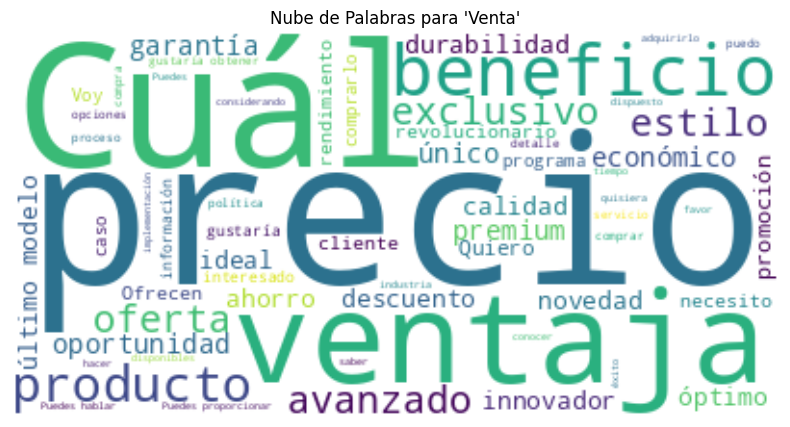

In [20]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Asegúrate de que X_train_raw y y_train sean tus datos de entrenamiento y etiquetas

# Filtrar los textos en tus datos de entrenamiento para cada etiqueta
textos_venta = X_train_raw[y_train == 1]['Conversación']
textos_no_venta = X_train_raw[y_train == 0]['Conversación']

# Unir todos los textos para cada etiqueta
texto_unido_venta = " ".join(texto for texto in textos_venta)
texto_unido_no_venta = " ".join(texto for texto in textos_no_venta)

# Crear y visualizar la nube de palabras para 'venta'
wordcloud_venta = WordCloud(stopwords=spanish_stopwords, background_color="white").generate(texto_unido_venta)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_venta, interpolation='bilinear')
plt.axis("off")
plt.title("Nube de Palabras para 'Venta'")
plt.show()



No compra nube de palabras

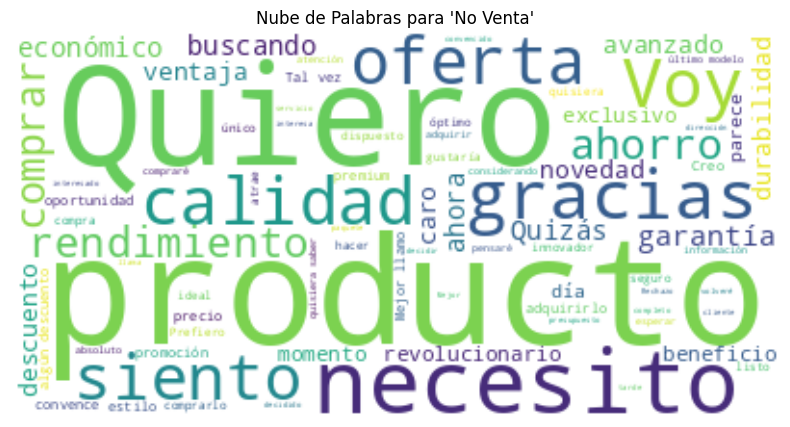

In [22]:
# Crear y visualizar la nube de palabras para 'no venta'
wordcloud_no_venta = WordCloud(stopwords=spanish_stopwords, background_color="white").generate(texto_unido_no_venta)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_no_venta, interpolation='bilinear')
plt.axis("off")
plt.title("Nube de Palabras para 'No Venta'")
plt.show()


## Modelo KNN

In [23]:
# Modelo KNN
knn_model = KNeighborsClassifier(n_neighbors=7)

# Entrenar el modelo KNN con los datos de entrenamiento
knn_model.fit(X_train, y_train)

# Predecir las etiquetas para el conjunto de datos de prueba
y_pred = knn_model.predict(X_test)



Creamos nuestra matriz de confusión lo que evaluamos son los valores predichos de nuestro modelo y_pred contra nuestros valores reales y_test

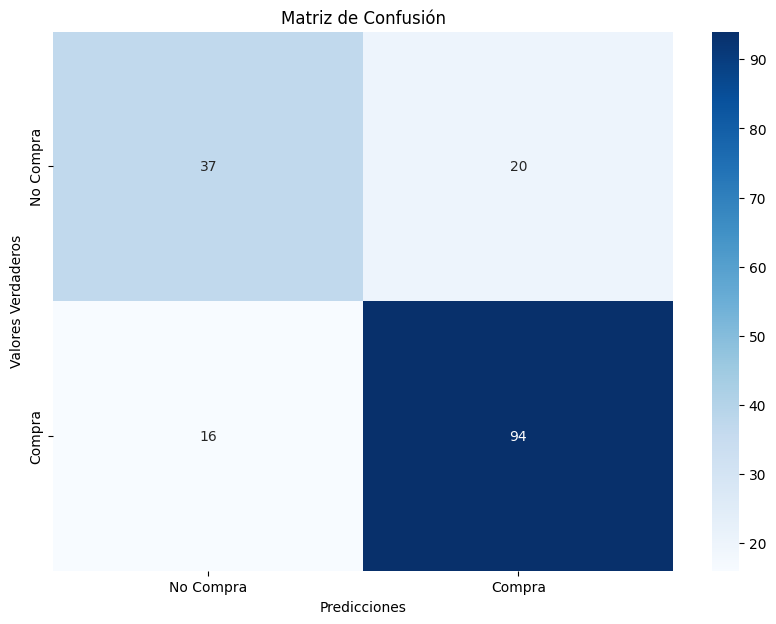

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Siendo y_test  tus etiquetas verdaderas y y_pred las predicciones de tu modelo
matriz_confusion = confusion_matrix(y_test, y_pred)

# Etiquetas para la matriz de confusión, ajusta estas según tus etiquetas de clase
etiquetas = ['No Compra', 'Compra']

# Crear el heatmap con Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(matriz_confusion, annot=True, fmt='g', cmap='Blues', xticklabels=etiquetas, yticklabels=etiquetas)
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.title('Matriz de Confusión')
plt.show()


**Búsqueda de mejores hiperparámetros**

La búsqueda de hiperparámetros óptimos es esencial para mejorar el rendimiento del modelo, ajustando configuraciones clave para obtener resultados óptimos.

In [25]:
from sklearn.model_selection import GridSearchCV

# Configurar los parámetros que quieres buscar
param_grid = {
    'n_neighbors': [3, 5, 7, 10, 15]
}

# Crear el modelo KNN que vas a usar
knn = KNeighborsClassifier()

# Crear el GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Ajustar el GridSearchCV a tus datos de entrenamiento
grid_search.fit(X_train, y_train)

# Ver los mejores parámetros encontrados
print("Mejores parámetros:", grid_search.best_params_)

# Mejor score encontrado
print("Mejor score de validación cruzada (accuracy):", grid_search.best_score_)

# También puedes recuperar el mejor modelo directamente
best_knn = grid_search.best_estimator_



Fitting 5 folds for each of 5 candidates, totalling 25 fits
Mejores parámetros: {'n_neighbors': 7}
Mejor score de validación cruzada (accuracy): 0.8273393273393275


Se hizo un grafica comparando el diferente rendimiento de modelos por numeros de vecinos

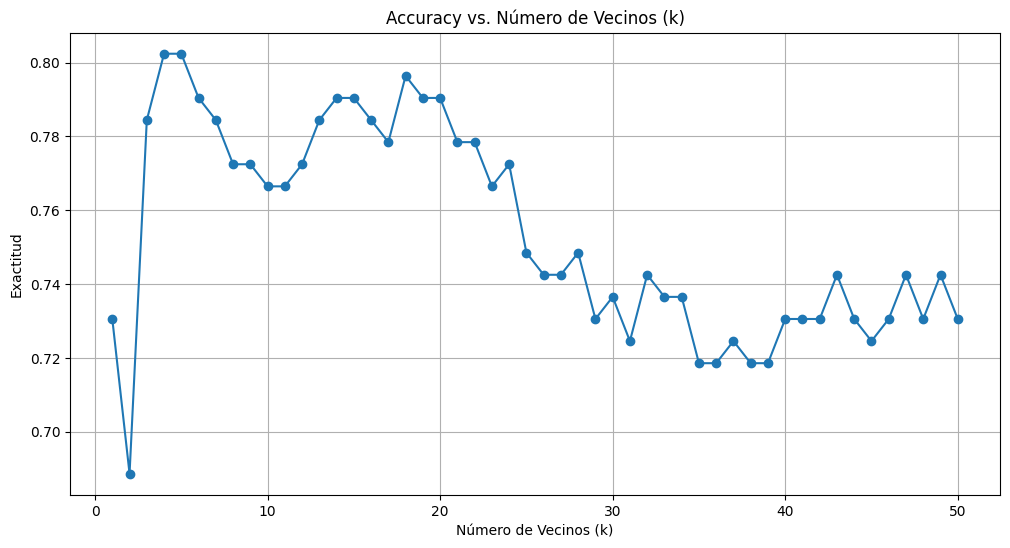

In [27]:
# Definir un rango de valores para "k"
k_values = list(range(1, 51))

# Listas para guardar las exactitudes para cada valor de "k"
accuracies = []

# Para cada valor de "k", entrenar un modelo KNN y evaluar su exactitud
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Graficar la exactitud en función de "k"
plt.figure(figsize=(12, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.title("Accuracy vs. Número de Vecinos (k)")
plt.xlabel("Número de Vecinos (k)")
plt.ylabel("Exactitud")
plt.grid(True)
plt.show()


**Modelo  Random Forest**

In [29]:
from sklearn.ensemble import RandomForestClassifier

# Modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)  # Puedes ajustar los parámetros según sea necesario

# Entrenar el modelo Random Forest con los datos de entrenamiento
rf_model.fit(X_train, y_train)

# Predecir las etiquetas para el conjunto de datos de prueba
y_pred_rf = rf_model.predict(X_test)


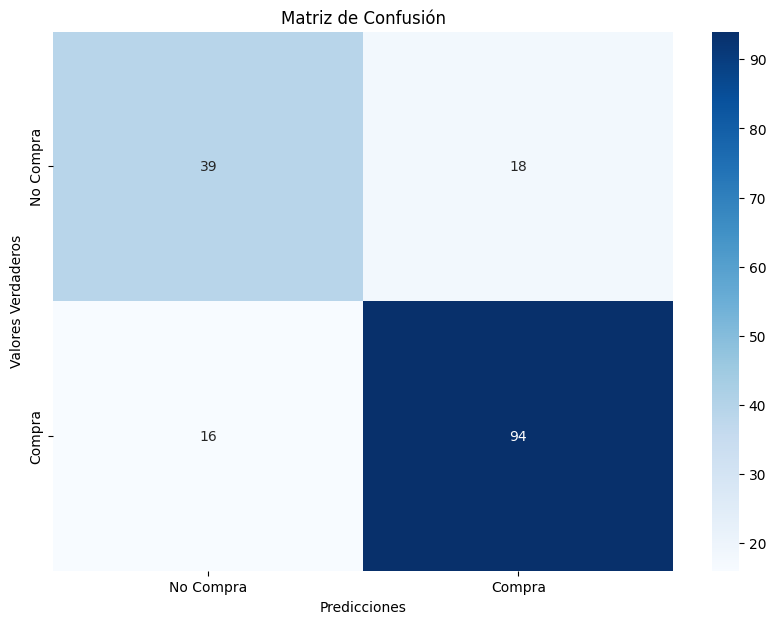

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que y_test son tus etiquetas verdaderas y y_pred las predicciones de tu modelo
matriz_confusion = confusion_matrix(y_test, y_pred_rf)

# Etiquetas para la matriz de confusión, ajusta estas según tus etiquetas de clase
etiquetas = ['No Compra', 'Compra']

# Crear el heatmap con Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(matriz_confusion, annot=True, fmt='g', cmap='Blues', xticklabels=etiquetas, yticklabels=etiquetas)
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.title('Matriz de Confusión')
plt.show()


In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Definir el espacio de parámetros para la búsqueda de cuadrícula
param_grid = {
    'n_estimators': [100, 200, 300],  # Número de árboles
    'max_depth': [10, 20]  # Profundidad máxima de los árboles
}

# Crear el modelo Random Forest
rf = RandomForestClassifier(random_state=0)

# Crear el GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Ajustar el GridSearchCV a tus datos de entrenamiento
grid_search.fit(X_train, y_train)

# Ver los mejores parámetros encontrados
print("Mejores parámetros:", grid_search.best_params_)

# Mejor score encontrado
print("Mejor score de validación cruzada (accuracy):", grid_search.best_score_)

# También puedes recuperar el mejor modelo directamente
best_rf = grid_search.best_estimator_


Fitting 3 folds for each of 6 candidates, totalling 18 fits
Mejores parámetros: {'max_depth': 20, 'n_estimators': 300}
Mejor score de validación cruzada (accuracy): 0.7990856688531108


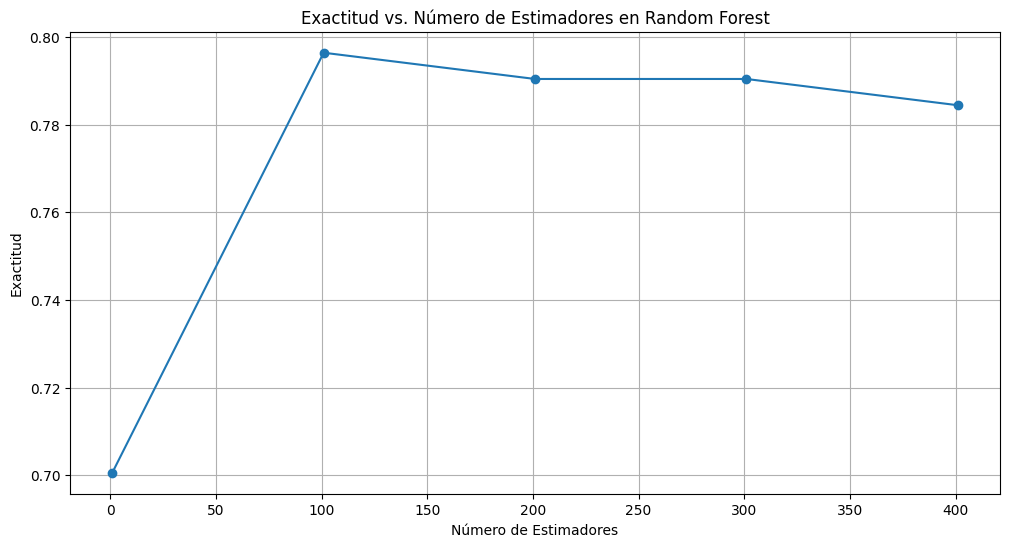

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Definir un rango de valores para el número de árboles en el bosque
n_estimators_values = list(range(1, 501,100))

# Lista para guardar las exactitudes para cada número de árboles
forest_accuracies = []

# Para cada valor de n_estimators, entrenar un modelo Random Forest y evaluar su exactitud
for n in n_estimators_values:
    rf = RandomForestClassifier(n_estimators=n, random_state=0)
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)
    accuracy_rf = accuracy_score(y_test, y_pred_rf)
    forest_accuracies.append(accuracy_rf)

# Graficar la exactitud en función del número de árboles
plt.figure(figsize=(12, 6))
plt.plot(n_estimators_values, forest_accuracies, marker='o', linestyle='-')
plt.title("Exactitud vs. Número de Estimadores en Random Forest")
plt.xlabel("Número de Estimadores")
plt.ylabel("Exactitud")
plt.grid(True)
plt.show()


Importancia en caracteristicas

In [33]:


from tabulate import tabulate

# Recuperar las importancias de las características
feature_importances = best_rf.feature_importances_

# Crear una lista de tuplas (característica, importancia)
feature_importance_list = [(feature, importance) for feature, importance in zip(X_train.columns, feature_importances)]

# Ordenar la lista por importancia
feature_importance_list.sort(key=lambda x: x[1], reverse=True)

# Imprimir la tabla de importancias
print(tabulate(feature_importance_list, headers=["Feature", "Importance"]))



Feature              Importance
-----------------  ------------
gracias             0.0396305
siento              0.0298445
puedes              0.0294903
cuál                0.028435
Horario_día         0.0248527
Horario_noche       0.0217695
buscando            0.0190394
ofrecen             0.0176754
óptimo              0.0168635
único               0.0159399
descuento           0.0155093
precio              0.0149611
mejor               0.0148039
momento             0.0146229
beneficio           0.0145987
ahorro              0.0144843
ahora               0.0143967
último              0.013982
quizás              0.0138465
ventaja             0.0134287
avanzado            0.0133913
creo                0.0130776
programa            0.0125788
modelo              0.0124804
premium             0.0121959
producto            0.0121663
oferta              0.0120601
necesito            0.0120076
caro                0.0119739
convence            0.0119477
económico           0.0119419
estilo  

**Árbol de Desición**

In [35]:
from sklearn.tree import DecisionTreeClassifier

# Modelo de Árbol de Decisión
dt_model = DecisionTreeClassifier(random_state=0)  # Puedes ajustar otros parámetros según sea necesario

# Entrenar el modelo de Árbol de Decisión con los datos de entrenamiento
dt_model.fit(X_train, y_train)

# Predecir las etiquetas para el conjunto de datos de prueba con el modelo de Árbol de Decisión
y_pred_dt = dt_model.predict(X_test)



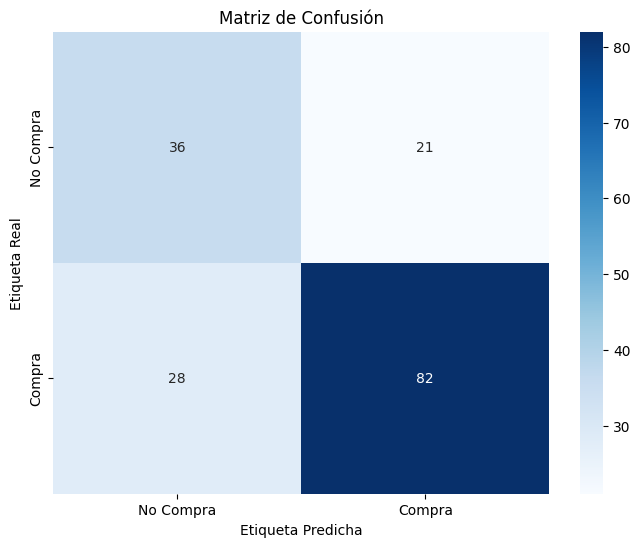

In [36]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns  # Opcional para una visualización más bonita

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred_dt)

# Etiquetas para la matriz de confusión, ajusta estas según tus etiquetas de clase
etiquetas = ['No Compra', 'Compra']

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=etiquetas, yticklabels=etiquetas)  # Usando seaborn para una visualización más bonita
plt.title('Matriz de Confusión')
plt.ylabel('Etiqueta Real')
plt.xlabel('Etiqueta Predicha')
plt.show()


**Modelo SVM**

In [37]:
from sklearn.svm import SVC

# Modelo SVM
svm_model = SVC(random_state=0)  # Puedes ajustar otros parámetros como 'kernel', 'C', etc.

# Entrenar el modelo SVM con los datos de entrenamiento
svm_model.fit(X_train, y_train)

# Predecir las etiquetas para el conjunto de datos de prueba con el modelo SVM
y_pred_svm = svm_model.predict(X_test)



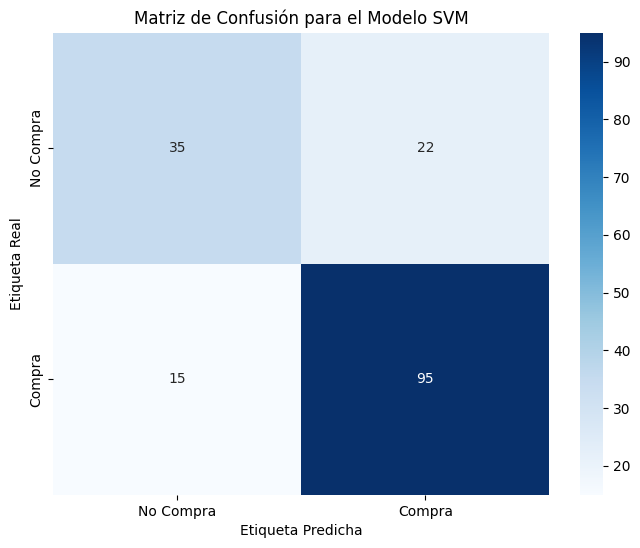

In [38]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular la matriz de confusión para el modelo SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Etiquetas para la matriz de confusión
etiquetas = ['No Compra', 'Compra']

# Graficar la matriz de confusión con etiquetas personalizadas
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=etiquetas, yticklabels=etiquetas)
plt.title('Matriz de Confusión para el Modelo SVM')
plt.ylabel('Etiqueta Real')
plt.xlabel('Etiqueta Predicha')
plt.show()


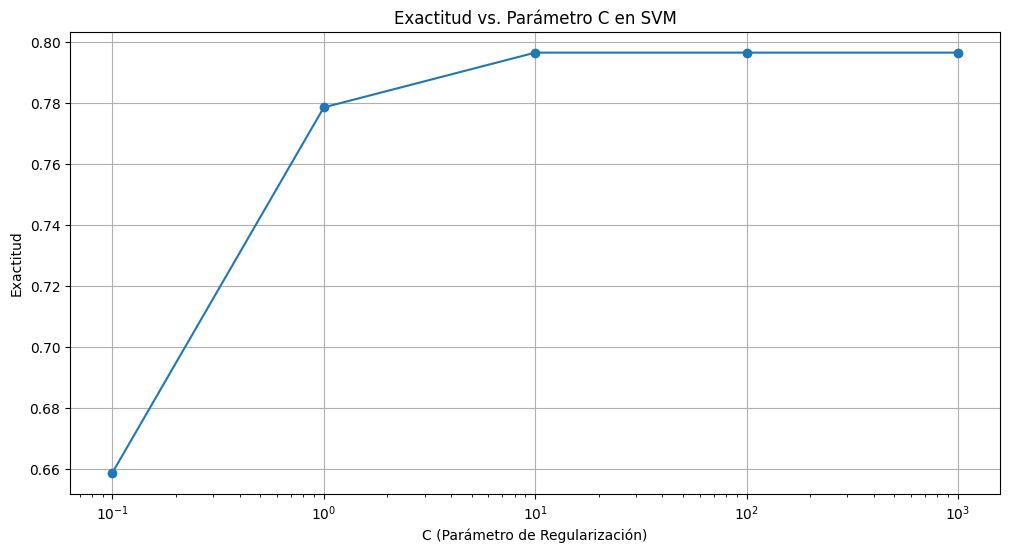

In [39]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Definir un rango de valores para el parámetro C
C_values = [0.1, 1, 10, 100, 1000]

# Lista para guardar las exactitudes para cada valor de C
svm_accuracies = []

# Para cada valor de C, entrenar un modelo SVM y evaluar su exactitud
for C in C_values:
    svm = SVC(C=C, random_state=0)
    svm.fit(X_train, y_train)
    y_pred_svm = svm.predict(X_test)
    accuracy_svm = accuracy_score(y_test, y_pred_svm)
    svm_accuracies.append(accuracy_svm)

# Graficar la exactitud en función del parámetro C
plt.figure(figsize=(12, 6))
plt.plot(C_values, svm_accuracies, marker='o', linestyle='-')
plt.title("Exactitud vs. Parámetro C en SVM")
plt.xlabel("C (Parámetro de Regularización)")
plt.ylabel("Exactitud")
plt.xscale('log')  # Escala logarítmica si los valores de C varían mucho
plt.grid(True)
plt.show()


# Metricas

# Knn

In [40]:

# Opcional: Evaluar el modelo
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7305389221556886
              precision    recall  f1-score   support

           0       0.67      0.42      0.52        57
           1       0.75      0.89      0.81       110

    accuracy                           0.73       167
   macro avg       0.71      0.66      0.66       167
weighted avg       0.72      0.73      0.71       167



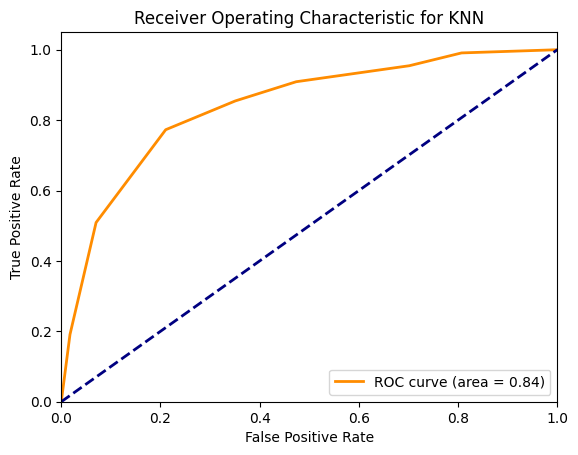

In [41]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Asegúrate de haber entrenado tu modelo KNN como se muestra en tu código

# Predecir las probabilidades para el conjunto de datos de prueba con el modelo KNN
y_pred_prob_knn = knn_model.predict_proba(X_test)[:, 1]  # obtener las probabilidades para la clase positiva

# Calcular los valores de TPR (True Positive Rate) y FPR (False Positive Rate) para varios umbrales
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_prob_knn)

# Calcular el Área Bajo la Curva (AUC) para el modelo KNN
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Graficar la curva ROC para el modelo KNN
plt.figure()
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for KNN')
plt.legend(loc="lower right")
plt.show()


# Random Forest

In [42]:

# Opcional: Evaluar el modelo
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Accuracy: 0.7844311377245509
              precision    recall  f1-score   support

           0       0.69      0.67      0.68        57
           1       0.83      0.85      0.84       110

    accuracy                           0.78       167
   macro avg       0.76      0.76      0.76       167
weighted avg       0.78      0.78      0.78       167



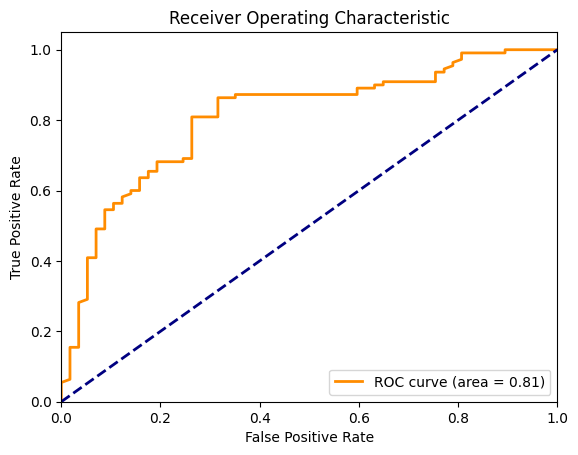

In [43]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predecir las probabilidades para el conjunto de datos de prueba
# Asegúrate de que estás usando el modelo correcto (en este caso, rf_model)
y_pred_prob_rf = rf_model.predict_proba(X_test)[:, 1]  # obtener las probabilidades para la clase positiva

# Calcular los valores de TPR (True Positive Rate) y FPR (False Positive Rate) para varios umbrales
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_rf)

# Calcular el Área Bajo la Curva (AUC)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


**Árbol de desición**

In [44]:
# Opcional: Evaluar el modelo
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Accuracy: 0.7065868263473054
              precision    recall  f1-score   support

           0       0.56      0.63      0.60        57
           1       0.80      0.75      0.77       110

    accuracy                           0.71       167
   macro avg       0.68      0.69      0.68       167
weighted avg       0.72      0.71      0.71       167



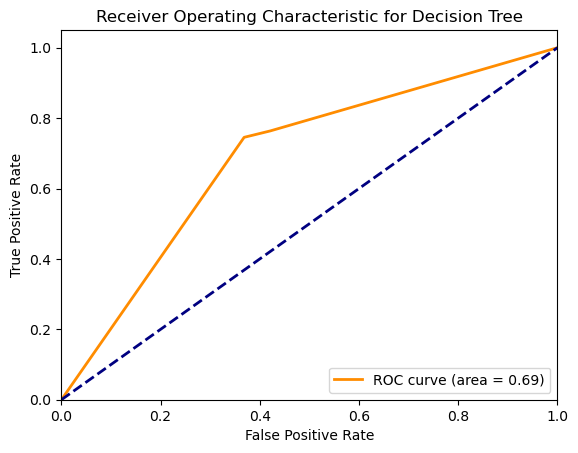

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predecir las probabilidades para el conjunto de datos de prueba con el modelo de Árbol de Decisión
# Asegúrate de que estás usando el modelo correcto (en este caso, dt_model)
y_pred_prob_dt = dt_model.predict_proba(X_test)[:, 1]  # obtener las probabilidades para la clase positiva

# Calcular los valores de TPR (True Positive Rate) y FPR (False Positive Rate) para varios umbrales
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_prob_dt)

# Calcular el Área Bajo la Curva (AUC) para el modelo de Árbol de Decisión
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Graficar la curva ROC para el modelo de Árbol de Decisión
plt.figure()
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Decision Tree')
plt.legend(loc="lower right")
plt.show()


## SVM

In [45]:

# Opcional: Evaluar el modelo
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

Accuracy: 0.7964071856287425
              precision    recall  f1-score   support

           0       0.70      0.70      0.70        57
           1       0.85      0.85      0.85       110

    accuracy                           0.80       167
   macro avg       0.77      0.77      0.77       167
weighted avg       0.80      0.80      0.80       167



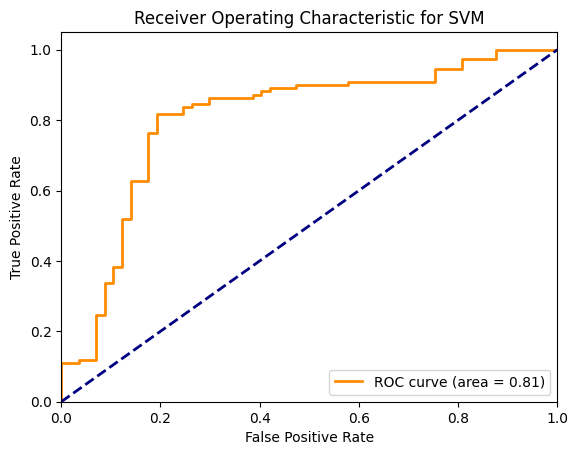

In [46]:
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Modelo SVM con probabilidades habilitadas
svm_model = SVC(random_state=0, probability=True)  # Habilitar probabilidades

# Entrenar el modelo SVM con los datos de entrenamiento
svm_model.fit(X_train, y_train)

# Predecir las probabilidades para el conjunto de datos de prueba con el modelo SVM
y_pred_prob_svm = svm_model.predict_proba(X_test)[:, 1]  # obtener las probabilidades para la clase positiva

# Calcular los valores de TPR (True Positive Rate) y FPR (False Positive Rate) para varios umbrales
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_prob_svm)

# Calcular el Área Bajo la Curva (AUC) para el modelo SVM
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Graficar la curva ROC para el modelo SVM
plt.figure()
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for SVM')
plt.legend(loc="lower right")
plt.show()


**Curva multiple ROC**

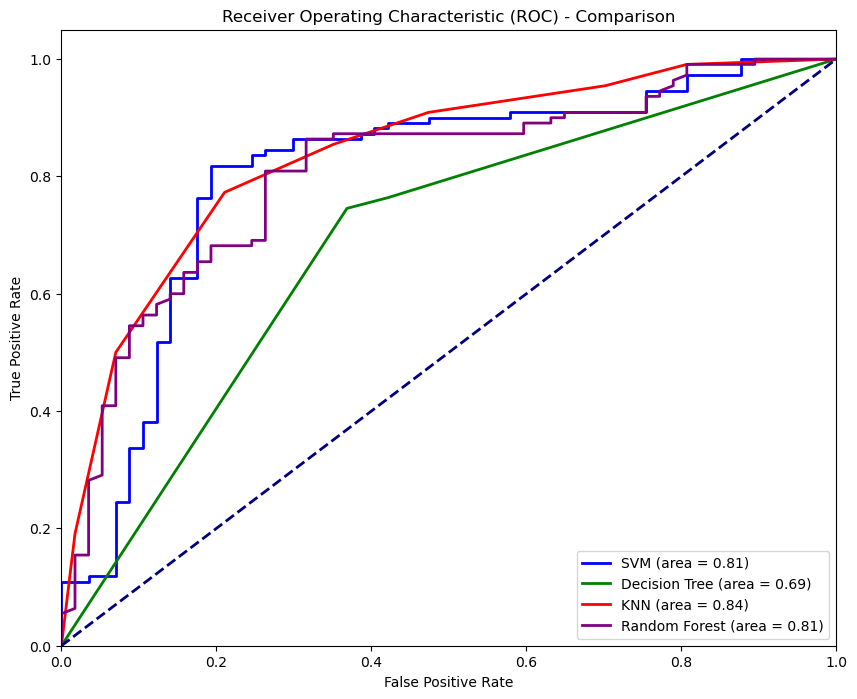

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Asegúrate de haber calculado previamente y_pred_prob_svm, y_pred_prob_dt, y_pred_prob_knn, y_pred_prob_rf
# para los modelos SVM, Árbol de Decisión, KNN y Random Forest respectivamente

# Calcular curva ROC y AUC para cada modelo
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Graficar todas las curvas ROC en la misma figura
plt.figure(figsize=(10, 8))

plt.plot(fpr_svm, tpr_svm, label='SVM (area = %0.2f)' % roc_auc_svm, color='blue', lw=2)
plt.plot(fpr_dt, tpr_dt, label='Decision Tree (area = %0.2f)' % roc_auc_dt, color='green', lw=2)
plt.plot(fpr_knn, tpr_knn, label='KNN (area = %0.2f)' % roc_auc_knn, color='red', lw=2)
plt.plot(fpr_rf, tpr_rf, label='Random Forest (area = %0.2f)' % roc_auc_rf, color='purple', lw=2)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Comparison')
plt.legend(loc="lower right")
plt.show()


In [47]:
from sklearn.metrics import f1_score